## Install Dependences

In [189]:
!pip install tqdm

# Install Libraries

In [190]:
import numpy as np
import os   
import subprocess 
import random
import math

# Visual
from tqdm import tqdm
def print_red(text):
    print('\x1b[31m' + text + '\x1b[0m')
def print_yellow(text):
    print('\x1b[33m' + text + '\x1b[0m')
def print_green(text):
    print('\x1b[32m' + text + '\x1b[0m')
def print_pink(text):
    print('\x1b[35m' + text + '\x1b[0m')
def print_cyan(text):
    print('\x1b[36m' + text + '\x1b[0m')

## Ranking all annotations
Run all the possible combinations of annotations with different models and stores the winners in the variable *rounds*. There can be multiple winners.

***An annotation is a winner if it has the best value above all of the other and the best time.***

##### Example of *rounds*

|  | Ann_1 | Ann_2 | Ann_3 | Ann_4 | ... | Ann_n |
| --- | --- | --- | --- | --- | --- | --- |
| Ins_1 | 0 | 0 | 1 | 1 | ... | 0 |
| Ins_2 | 0 | 1 | 0 | 0 | ... | 1 |
| Ins_3 | 1 | 0 | 1 | 0 | ... | 0 |
| ... | ... | ... | ... | ... | ... | ... |
| Ins_m | 1 | 0 | 1 | 0 | ... | 0 |

In [191]:
import re
def select_winners(mnts):
    winners = [1] * len(mnts)
    min_mnt = min(mnts)
    # print_green(f'min_mnt {min_mnt} min_time {min_time}.')
    for i, mnt in enumerate(mnts):
        if math.isinf(mnt):
            winners[i] = 0
        else:
            if mnt != min_mnt:
                winners[i] = 0

    return winners

def solvers_winners(index, solvers, instances_folder, timeout_mzn, timeout):
    # annotations = [os.path.join(models_folder, f) for f in os.listdir(models_folder) if f.endswith('.mzn')]
    instance = [os.path.join(instances_folder, f) for f in os.listdir(instances_folder) if f.endswith('.dzn')]
    # instance = [os.path.join(instances_folder, f) for f in os.listdir(instances_folder) if f.endswith('.dzn')]
    # Sort
    def numeric_sort_key(file_path):
        match = re.search(r'\d+', file_path)
        return int(match.group()) if match else file_path
    instance = sorted(instance, key=numeric_sort_key)[index]

    
    mnts = [0] * len(solvers)
    timeout_mzn = timeout_mzn*1000
    
    for i, solver in tqdm(enumerate(solvers), desc='Processing Instance '+str(index), unit='items'):        
        # Run the minizinc command for the current annotation and data file  
        cmd = f"minizinc --solver {solver} --output-time ../models/largest-indomain_max.mzn {instance} --output-time --solver-time-limit {timeout_mzn}"        
        proc = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
        try: 
            # Get output from fzn
            stdout, stderr = proc.communicate(timeout=timeout) 
            stdout = stdout.decode()
            try:
                # Store value mnt (temp).
                start = stdout.find('mnt = ')+6
                end = stdout.find(';',start)
                mnt = int(stdout[start:end])
            except:
                if stdout.find('UNSATISFIABLE') != -1:
                    mnt = 0
                else:
                    mnt = float('inf')
            # print_green(f'{annotation[10:-4]} with {instance[3:-4]} SOLVED: {mnt} in {time:.2f} seconds.')

        except subprocess.TimeoutExpired: 
            print_red(f'Error from minizinc: Stopping.')                
            mnt = float('inf')
            if os.name == 'nt': # If the os is Windows
                subprocess.call(['taskkill', '/F', '/T', '/PID', str(proc.pid)]) # Force kill the process
            else:
                os.killpg(os.getpgid(proc.pid), signal.SIGTERM) # Kill the process group
                
        mnts[i] = mnt
    # print('mnts',mnts)
    # print('times',times)
    return select_winners(mnts)

n_instances = 100
solvers = ["HiGHS", "COIN-BC", "OR-TOOLS", "Gecode", "Chuffed"]
rounds = np.zeros((n_instances, len(solvers)))

# loop through the list with a progress bar
for i in range(0, n_instances):
    rounds[i]=np.array(solvers_winners(i, solvers, '../instances',5, 10))
    # print_yellow(f'Finished: {i}')
print_green(f'Done!')

# Save rounds to another file
print_cyan(f'Save rounds to another file')
path = '../instances/rounds.txt'
with open(path, 'w', encoding='utf8') as file_object:
    file_object.write(str(rounds.tolist()))
print_green(f'Done!')

Processing Instance 0: 5items [00:26,  5.24s/items]
Processing Instance 1: 5items [00:24,  4.83s/items]
Processing Instance 2: 5items [00:26,  5.33s/items]
Processing Instance 3: 5items [00:21,  4.21s/items]
Processing Instance 4: 5items [00:22,  4.50s/items]
Processing Instance 5: 5items [00:20,  4.05s/items]
Processing Instance 6: 5items [00:26,  5.31s/items]
Processing Instance 7: 5items [00:21,  4.34s/items]
Processing Instance 8: 5items [00:26,  5.31s/items]
Processing Instance 9: 5items [00:29,  5.85s/items]
Processing Instance 10: 5items [00:25,  5.07s/items]
Processing Instance 11: 5items [00:29,  5.97s/items]
Processing Instance 12: 5items [00:22,  4.41s/items]
Processing Instance 13: 5items [00:26,  5.30s/items]
Processing Instance 14: 1items [00:10, 10.10s/items]

Error from minizinc: Stopping.


Processing Instance 14: 5items [00:31,  6.27s/items]
Processing Instance 15: 5items [00:25,  5.16s/items]
Processing Instance 16: 5items [00:26,  5.30s/items]
Processing Instance 17: 5items [00:21,  4.40s/items]
Processing Instance 18: 5items [00:26,  5.22s/items]
Processing Instance 19: 5items [00:26,  5.36s/items]
Processing Instance 20: 5items [00:28,  5.74s/items]
Processing Instance 21: 5items [00:25,  5.18s/items]
Processing Instance 22: 5items [00:25,  5.08s/items]
Processing Instance 23: 5items [00:21,  4.22s/items]
Processing Instance 24: 1items [00:10, 10.09s/items]

Error from minizinc: Stopping.


Processing Instance 24: 5items [00:27,  5.49s/items]
Processing Instance 25: 5items [00:22,  4.53s/items]
Processing Instance 26: 5items [00:24,  4.98s/items]
Processing Instance 27: 5items [00:24,  4.90s/items]
Processing Instance 28: 5items [00:22,  4.53s/items]
Processing Instance 29: 5items [00:26,  5.34s/items]
Processing Instance 30: 5items [00:24,  4.90s/items]
Processing Instance 31: 1items [00:10, 10.09s/items]

Error from minizinc: Stopping.


Processing Instance 31: 5items [00:31,  6.24s/items]
Processing Instance 32: 5items [00:21,  4.22s/items]
Processing Instance 33: 5items [00:22,  4.55s/items]
Processing Instance 34: 5items [00:27,  5.44s/items]
Processing Instance 35: 5items [00:26,  5.27s/items]
Processing Instance 36: 5items [00:21,  4.32s/items]
Processing Instance 37: 5items [00:19,  3.96s/items]
Processing Instance 38: 5items [00:25,  5.12s/items]
Processing Instance 39: 5items [00:22,  4.46s/items]
Processing Instance 40: 5items [00:23,  4.77s/items]
Processing Instance 41: 5items [00:27,  5.57s/items]
Processing Instance 42: 5items [00:26,  5.38s/items]
Processing Instance 43: 5items [00:22,  4.57s/items]
Processing Instance 44: 5items [00:25,  5.04s/items]
Processing Instance 45: 5items [00:22,  4.50s/items]
Processing Instance 46: 5items [00:21,  4.38s/items]
Processing Instance 47: 5items [00:21,  4.38s/items]
Processing Instance 48: 5items [00:21,  4.35s/items]
Processing Instance 49: 1items [00:10, 10.09s/

Error from minizinc: Stopping.


Processing Instance 49: 5items [00:26,  5.27s/items]
Processing Instance 50: 5items [00:27,  5.45s/items]
Processing Instance 51: 5items [00:21,  4.37s/items]
Processing Instance 52: 5items [00:23,  4.62s/items]
Processing Instance 53: 5items [00:21,  4.34s/items]
Processing Instance 54: 5items [00:25,  5.01s/items]
Processing Instance 55: 5items [00:19,  3.95s/items]
Processing Instance 56: 5items [00:27,  5.57s/items]
Processing Instance 57: 5items [00:21,  4.39s/items]
Processing Instance 58: 5items [00:22,  4.47s/items]
Processing Instance 59: 5items [00:23,  4.72s/items]
Processing Instance 60: 5items [00:21,  4.38s/items]
Processing Instance 61: 5items [00:24,  4.99s/items]
Processing Instance 62: 5items [00:26,  5.22s/items]
Processing Instance 63: 5items [00:24,  4.90s/items]
Processing Instance 64: 5items [00:23,  4.63s/items]
Processing Instance 65: 5items [00:22,  4.40s/items]
Processing Instance 66: 5items [00:23,  4.69s/items]
Processing Instance 67: 1items [00:10, 10.09s/

Error from minizinc: Stopping.


Processing Instance 67: 5items [00:28,  5.74s/items]
Processing Instance 68: 5items [00:26,  5.29s/items]
Processing Instance 69: 5items [00:26,  5.31s/items]
Processing Instance 70: 5items [00:22,  4.53s/items]
Processing Instance 71: 5items [00:24,  4.90s/items]
Processing Instance 72: 5items [00:22,  4.49s/items]
Processing Instance 73: 5items [00:22,  4.44s/items]
Processing Instance 74: 5items [00:26,  5.29s/items]
Processing Instance 75: 5items [00:22,  4.56s/items]
Processing Instance 76: 5items [00:21,  4.36s/items]
Processing Instance 77: 5items [00:27,  5.46s/items]
Processing Instance 78: 5items [00:22,  4.50s/items]
Processing Instance 79: 5items [00:22,  4.55s/items]
Processing Instance 80: 1items [00:10, 10.10s/items]

Error from minizinc: Stopping.


Processing Instance 80: 5items [00:26,  5.26s/items]
Processing Instance 81: 5items [00:25,  5.12s/items]
Processing Instance 82: 5items [00:27,  5.56s/items]
Processing Instance 83: 5items [00:26,  5.37s/items]
Processing Instance 84: 5items [00:25,  5.10s/items]
Processing Instance 85: 5items [00:23,  4.79s/items]
Processing Instance 86: 5items [00:21,  4.38s/items]
Processing Instance 87: 5items [00:29,  5.88s/items]
Processing Instance 88: 5items [00:21,  4.22s/items]
Processing Instance 89: 5items [00:22,  4.53s/items]
Processing Instance 90: 5items [00:27,  5.57s/items]
Processing Instance 91: 5items [00:25,  5.05s/items]
Processing Instance 92: 5items [00:20,  4.19s/items]
Processing Instance 93: 5items [00:24,  4.94s/items]
Processing Instance 94: 5items [00:24,  4.81s/items]
Processing Instance 95: 5items [00:23,  4.60s/items]
Processing Instance 96: 5items [00:26,  5.23s/items]
Processing Instance 97: 5items [00:26,  5.21s/items]
Processing Instance 98: 5items [00:22,  4.42s/

Done!
Save rounds to another file
Done!


## Store and transform *rounds*

Save *rounds* to another file, sum all the rounds to get the best annotation.

In [192]:
rounds = ''
with open('../instances/rounds.txt', encoding="utf8") as file_object:
    rounds = np.array(eval(file_object.read()))
        
print_pink("rounds")
print(rounds)

# sum the rounds
scores = np.sum(rounds, axis=0)
scores = scores.astype(int)

# print the scores
print_pink("\nFinal score:")
print(scores)

rounds
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1

## Plot the scores on a bar chart.

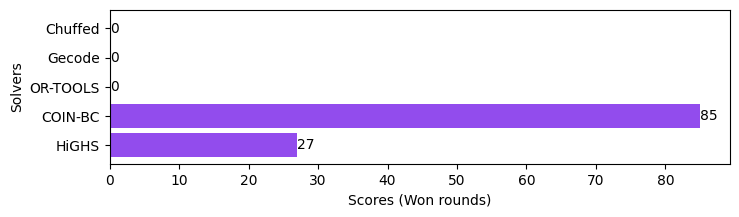

In [193]:
import matplotlib.pyplot as plt 

# Define figure size
fig, ax = plt.subplots(figsize=(8, 2))

solvers = ["HiGHS", "COIN-BC", "OR-TOOLS", "Gecode", "Chuffed"]

# Use barh function to create horizontal bar chart
ax.barh(solvers, scores, color='#924ced')

# Set x-axis label and y-axis label
ax.set_xlabel('Scores (Won rounds)')
ax.set_ylabel('Solvers')

# Add value labels next to each bar
for i, v in enumerate(scores):
    ax.text(v, i, str(v), color='black', ha='left', va='center')

# Show the plot
plt.show()
